In [91]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [29]:
#--------------scrapped songs from spotify with their audio features-------------#

audio1_df = pd.read_csv('audio_features_album.csv')
audio2_df = pd.read_csv('audio_features_album2.csv')
audio3_df = pd.read_csv('audio_features_album3.csv')
audio4_df = pd.read_csv('audio_features_album4.csv')
audio5_df = pd.read_csv('audio_features_album5.csv')
audio6_df = pd.read_csv('audio_features_album6.csv')
audio7_df = pd.read_csv('audio_features_album7.csv')
audio8_df = pd.read_csv('audio_features_album8.csv')
audio9_df = pd.read_csv('audio_features_album9.csv')

In [60]:
#--------concatination of the all audio files----------#

df = pd.concat([audio1_df,audio2_df,audio3_df,audio4_df,audio5_df,audio6_df,audio7_df,audio8_df,audio9_df],ignore_index = True)
df.tail(1) 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artist,song_name
2051,0.877,0.854,1,-4.523,1,0.147,0.0544,0.000055,0.144,0.54,114.472,audio_features,0sKlV58cODrjxGFOyf9IXY,spotify:track:0sKlV58cODrjxGFOyf9IXY,https://api.spotify.com/v1/tracks/0sKlV58cODrj...,https://api.spotify.com/v1/audio-analysis/0sKl...,298120,4,Michael Jackson,The Way You Make Me Feel - 2012 Remaster


In [70]:
#-----------removing the duplicates------#  

df = df.drop_duplicates().reset_index()

In [61]:
df.tail(1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artist,song_name
2051,0.877,0.854,1,-4.523,1,0.147,0.0544,0.000055,0.144,0.54,114.472,audio_features,0sKlV58cODrjxGFOyf9IXY,spotify:track:0sKlV58cODrjxGFOyf9IXY,https://api.spotify.com/v1/tracks/0sKlV58cODrj...,https://api.spotify.com/v1/audio-analysis/0sKl...,298120,4,Michael Jackson,The Way You Make Me Feel - 2012 Remaster


In [54]:
#---------------droping columns prior to modelling-------------#

x1 = df.drop(['index','type', 'id', 'uri', 'track_href', 'analysis_url', 'artist', 'song_name'], axis = 1)

In [109]:
x = df.drop(['mode','time_signature', 'duration_ms','index','type', 'id', 'uri', 'track_href', 'analysis_url', 'artist', 'song_name'], axis = 1)

In [110]:
#---------------standardization of the features (z-score)-------------#

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [106]:
#----Before Scaling-----#

x.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.658,0.634,1,-5.797,0,0.0413,0.0106,0.000000,0.132,0.290,139.980
1,0.333,0.637,1,-4.904,0,0.0581,0.1310,0.000018,0.149,0.132,139.898
2,0.713,0.676,10,-5.483,1,0.0270,0.0377,0.000000,0.154,0.721,99.048
3,0.748,0.551,11,-6.120,1,0.0349,0.2350,0.000000,0.119,0.660,103.953
4,0.595,0.759,11,-4.245,0,0.0423,0.1410,0.000000,0.172,0.515,80.953


In [107]:
#----After Scaling-----#

x_scaled_df = pd.DataFrame(x_scaled, columns = x.columns)
x_scaled_df.head() 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.607923,0.499544,-1.103639,0.804364,-1.396676,-0.411186,-1.067508,-0.810434,-0.152548,-0.415202,0.869689
1,-0.974886,0.508562,-1.103639,0.893629,-1.396676,-0.179240,-0.777437,-0.810392,-0.000396,-1.013377,0.866932
2,0.875783,0.625801,1.450410,0.835752,0.715986,-0.608616,-1.002218,-0.810434,0.044354,1.216529,-0.506498
3,1.046240,0.250036,1.734194,0.772077,0.715986,-0.499546,-0.526877,-0.810434,-0.268899,0.985588,-0.341586
4,0.301102,0.875308,1.734194,0.959502,-1.396676,-0.397380,-0.753344,-0.810434,0.205456,0.436630,-1.114876


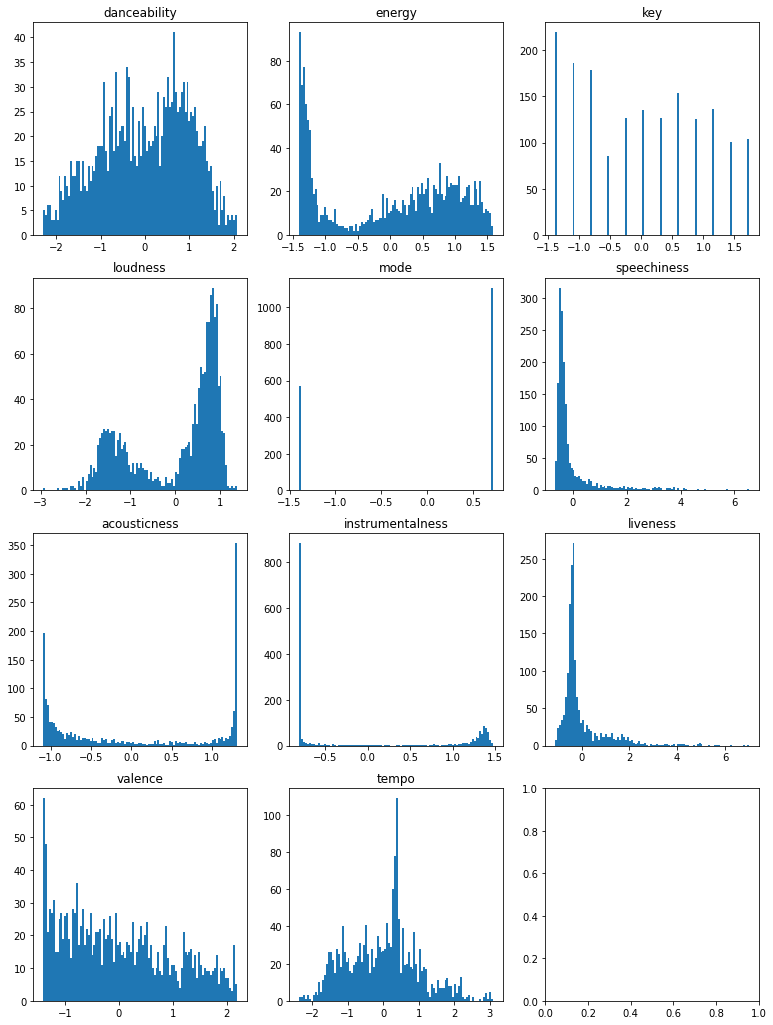

In [108]:
fig, ax = plt.subplots(4,3, figsize = (13,18))

ax[0,0].set_title('danceability')
ax[0,1].set_title('energy')
ax[0,2].set_title('key')
ax[1,0].set_title('loudness')
ax[1,1].set_title('mode')
ax[1,2].set_title('speechiness')
ax[2,0].set_title('acousticness')
ax[2,1].set_title('instrumentalness')
ax[2,2].set_title('liveness')
ax[3,0].set_title('valence')
ax[3,1].set_title('tempo')


ax[0,0].hist(x_scaled_df['danceability'], bins = 100)           #sns.distplot(dataframe)
ax[0,1].hist(x_scaled_df['energy'], bins = 100)
ax[0,2].hist(x_scaled_df['key'], bins = 100)
ax[1,0].hist(x_scaled_df['loudness'], bins =100)
ax[1,1].hist(x_scaled_df['mode'], bins =100)
ax[1,2].hist(x_scaled_df['speechiness'], bins =100)
ax[2,0].hist(x_scaled_df['acousticness'], bins =100)
ax[2,1].hist(x_scaled_df['instrumentalness'], bins =100)
ax[2,2].hist(x_scaled_df['liveness'], bins =100)
ax[3,0].hist(x_scaled_df['valence'], bins =100)
ax[3,1].hist(x_scaled_df['tempo'], bins =100)


plt.show()

In [111]:
#--------------K Means Clustering------------#

kmeans = KMeans(n_clusters = 8, random_state = 15)
kmeans.fit(x_scaled_df)

KMeans(random_state=15)

In [112]:
kmeans.labels_

array([1, 1, 3, ..., 7, 1, 7])

In [114]:
kmeans.inertia_

6403.467794290443

In [115]:
#--------------Model prediction results on the training data------------#

clusters = kmeans.predict(x_scaled_df)
pd.Series(clusters).value_counts().sort_index()

0    276
1    298
2    130
3    262
4    148
5    115
6    160
7    287
dtype: int64

In [116]:
x['cluster'] = clusters
x.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.658,0.634,1,-5.797,0.0413,0.0106,0.000000,0.132,0.290,139.980,1
1,0.333,0.637,1,-4.904,0.0581,0.1310,0.000018,0.149,0.132,139.898,1
2,0.713,0.676,10,-5.483,0.0270,0.0377,0.000000,0.154,0.721,99.048,3
3,0.748,0.551,11,-6.120,0.0349,0.2350,0.000000,0.119,0.660,103.953,3
4,0.595,0.759,11,-4.245,0.0423,0.1410,0.000000,0.172,0.515,80.953,1


In [117]:
kmeans2 = KMeans(n_clusters=8,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(x_scaled_df)
print(kmeans2.inertia_)

6403.6275707521945


Training a K-Means model with 2 neighbours! 

Training a K-Means model with 3 neighbours! 

Training a K-Means model with 4 neighbours! 

Training a K-Means model with 5 neighbours! 

Training a K-Means model with 6 neighbours! 

Training a K-Means model with 7 neighbours! 

Training a K-Means model with 8 neighbours! 

Training a K-Means model with 9 neighbours! 

Training a K-Means model with 10 neighbours! 

Training a K-Means model with 11 neighbours! 

Training a K-Means model with 12 neighbours! 

Training a K-Means model with 13 neighbours! 

Training a K-Means model with 14 neighbours! 

Training a K-Means model with 15 neighbours! 

Training a K-Means model with 16 neighbours! 

Training a K-Means model with 17 neighbours! 

Training a K-Means model with 18 neighbours! 

Training a K-Means model with 19 neighbours! 

Training a K-Means model with 20 neighbours! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

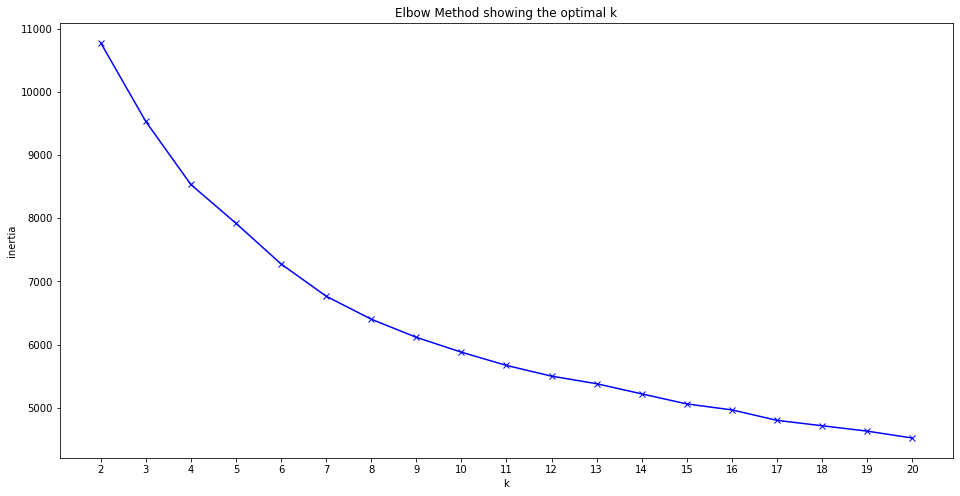

In [84]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} neighbours! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(x_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

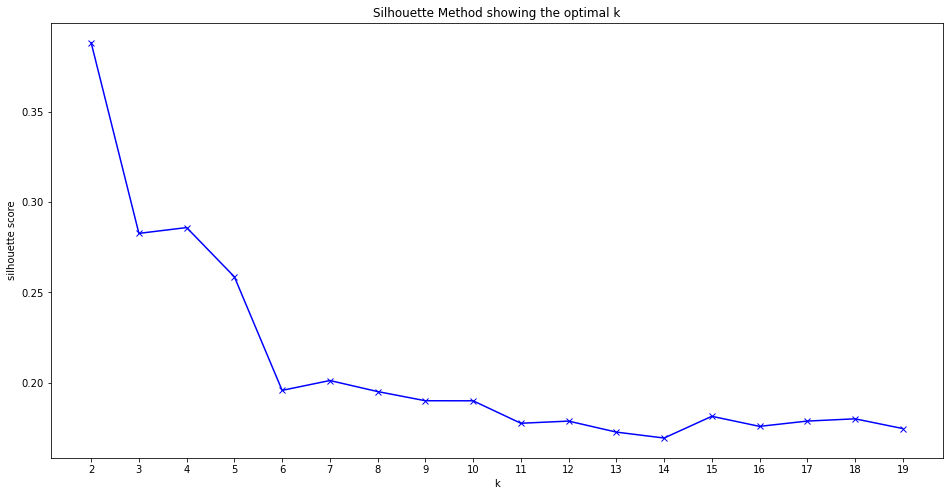

In [90]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle


K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(x_scaled_df)
    #filename = "Model/kmeans_" + str(k) + ".pickle"
    #with open(filename, "wb") as f:
        #pickle.dump(kmeans,f)
    silhouette.append(silhouette_score(x_scaled_df, kmeans.predict(x_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [ ]:

import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("Model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("Model/kmeans_4.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [ ]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
    except FileNotFoundError: 
        print("File not found!")



In [ ]:
scaler2 = load("Model/scaler.pickle")
scaler2